CYBER-BULLYING TWEETS CLASSIFICATION USING NLP & ML

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\cyberbullying_tweets.csv")

ACTUAL DATASET

In [3]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [4]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
#tokenise,stopwords, stem, lemmatise

PREPROCESS TWEETS

In [9]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #tokenize
def preprocess(text):
    tweet_tokenised=word_tokenize(text)
    lowercase_reviews=[word.lower() for word in tweet_tokenised]
    stop_words=set(stopwords.words('english'))
    no_stopwords=[word for word in lowercase_reviews if word not in stop_words]
    punct=set(string.punctuation)
    cleaned1=[word for word in no_stopwords if  word not in punct]
    alphas = [word for word in cleaned1 if word.isalpha()]
    lemm=WordNetLemmatizer()
    lemm_word=[lemm.lemmatize(word) for word in alphas]
    return " ".join(lemm_word)
df['tweet_text']=df['tweet_text'].apply(preprocess)

In [10]:
df['tweet_text']

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2           xochitlsuckkks classy whore red velvet cupcake
3        meh p thanks head concerned another angry dude...
4        rudhoeenglish isi account pretending kurdish a...
                               ...                        
47687    black ppl expected anything depended anything ...
47688    turner withhold disappointment turner called c...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel youre nigger fucking u...
47691    bro u got ta chill rt chillshrammy dog fuck kp...
Name: tweet_text, Length: 47692, dtype: object

SENTIMENT ANALYSIS OF TWEETS 

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
df['Sentiment']=df['tweet_text'].apply(lambda review:sid.polarity_scores(' '.join(review)))
df['compound_score']=df['Sentiment'].apply(lambda score_dict:score_dict['compound'])
df['sentiment'] = df['compound_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))
df[['tweet_text','cyberbullying_type', 'compound_score','sentiment']].tail(10)

,tweet_text,cyberbullying_type,compound_score,sentiment
47682,right atlanta full called shoot em negro wendy...,ethnicity,0.0,neutral
47683,black color african american culture nigger me...,ethnicity,0.0,neutral
47684,black soldier fought wwi many came home refusi...,ethnicity,0.0,neutral
47685,true nice show watch racism incident ricky pic...,ethnicity,0.0,neutral
47686,yourfavwhiteguy shut fuck upabout dumb app act...,ethnicity,0.0,neutral
47687,black ppl expected anything depended anything ...,ethnicity,0.0,neutral
47688,turner withhold disappointment turner called c...,ethnicity,0.0,neutral
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,0.0,neutral
47690,yea fuck rt therealexel youre nigger fucking u...,ethnicity,0.0,neutral
47691,bro u got ta chill rt chillshrammy dog fuck kp...,ethnicity,0.0,neutral


In [25]:
from textblob import TextBlob
df['textblob_sentiment'] = df['tweet_text'].apply(lambda review: TextBlob(review).sentiment.polarity)
df['sentiment'] = df['textblob_sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


In [26]:
df[['tweet_text','textblob_sentiment','sentiment']]

,tweet_text,textblob_sentiment,sentiment
0,word katandandre food crapilicious mkr,0.000000,neutral
1,aussietv white mkr theblock imacelebrityau tod...,0.000000,neutral
2,xochitlsuckkks classy whore red velvet cupcake,0.050000,positive
3,meh p thanks head concerned another angry dude...,-0.150000,negative
4,rudhoeenglish isi account pretending kurdish a...,0.000000,neutral
...,...,...,...
47687,black ppl expected anything depended anything ...,0.010417,neutral
47688,turner withhold disappointment turner called c...,-0.300000,negative
47689,swear god dumb nigger bitch got bleach hair re...,-0.387500,negative
47690,yea fuck rt therealexel youre nigger fucking u...,-0.458333,negative


MACHINE LEARNING MODEL

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x = df['tweet_text']
y = df['cyberbullying_type']
X_tfidf=vectorizer.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [34]:
#classification 
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

ACCURACY OF MODEL

In [35]:
#predict,accuracy,confusion metrics
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 83.45%


PLOT THE CYBER-BULLYING TWEETS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

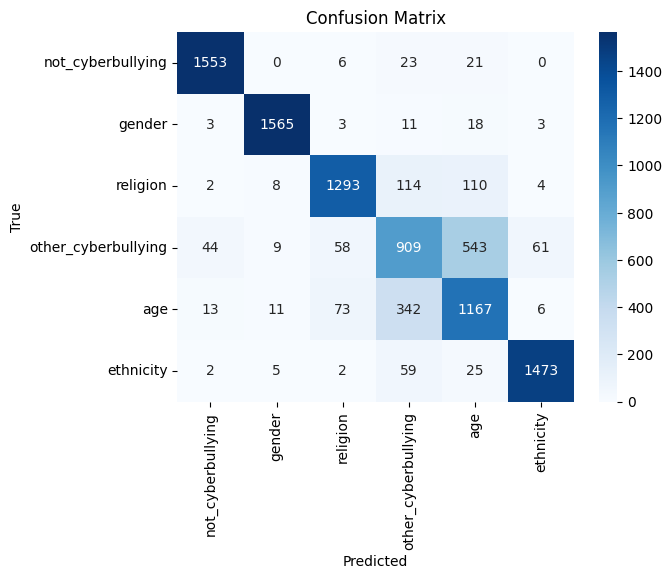

In [38]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
labels = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', 'ethnicity']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TEST WITH NEW TWEETS

In [60]:
def test_cyberbullying(text):
    message = preprocess(text)
    message_vect = vectorizer.transform([message])
    prediction = model.predict(message_vect)
    return prediction[0]

# Test with new messages
print(test_cyberbullying("Let's meet up for the project discussion tomorrow."))
print(test_cyberbullying("You are so dumb and worthless, nobody likes you! coz ur black!!"))
print(test_cyberbullying("People of your religion are terrorists, stay away from us!"))



not_cyberbullying
ethnicity
religion


RESULT:
 This project aimed to develop a machine learning model to classify and detect cyberbullying content on social media platforms. We worked with a diverse dataset containing various types of cyberbullying (e.g., gender, age, religion, ethnicity) and implemented several techniques to preprocess, vectorize, and train the model.